# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [35]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [37]:
headers = list(data.columns.values)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.00000,0.176152,1.0,0.158974,-0.452632,-0.967842,-0.972900,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,-0.99998,0.460317,-1.0,0.035897,-0.210526,-0.964131,-0.971093,1.0,-1.0,-1.0,-1.0,1.0,1.0
2,-0.99996,0.248006,-1.0,0.128205,-0.431579,-0.965368,-0.974706,1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,-0.99994,0.056911,1.0,0.169231,-0.242105,-0.962894,-0.969286,-1.0,-1.0,-1.0,-1.0,1.0,1.0
4,-0.99992,0.033837,-1.0,0.035897,-0.515789,-0.969079,-0.976513,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


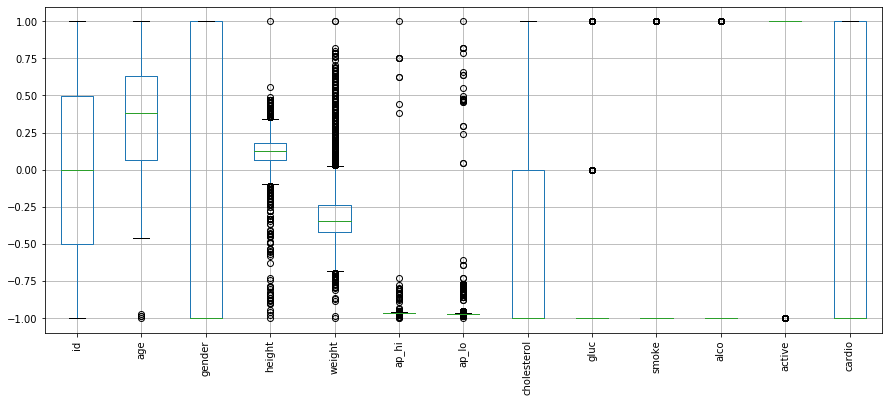

In [38]:
 boxplot = df_norm.boxplot(figsize=(15,6), rot=90)

In [39]:
low = .05
high = .95
quant_df = df_norm.quantile([low, high])

In [40]:
df_norm.age = df_norm.age.loc[(df_norm.age >= quant_df.age[low])
                              & (df_norm.age <= quant_df.age[high])]

df_norm.height = df_norm.height.loc[(df_norm.height >= quant_df.height[low])
                              & (df_norm.height <= quant_df.height[high])]

df_norm.weight = df_norm.weight.loc[(df_norm.weight >= quant_df.weight[low])
                              & (df_norm.weight <= quant_df.weight[high])]

df_norm.ap_hi = df_norm.ap_hi.loc[(df_norm.ap_hi >= quant_df.ap_hi[low])
                              & (df_norm.ap_hi <= quant_df.ap_hi[high])]

df_norm.ap_lo = df_norm.ap_lo.loc[(df_norm.ap_lo >= quant_df.ap_lo[low])
                              & (df_norm.ap_lo <= quant_df.ap_lo[high])]

df_norm.gluc = df_norm.gluc.loc[(df_norm.gluc >= quant_df.gluc[low])
                              & (df_norm.gluc <= quant_df.gluc[high])]

df_norm.smoke = df_norm.smoke.loc[(df_norm.smoke >= quant_df.smoke[low])
                              & (df_norm.smoke <= quant_df.smoke[high])]

df_norm.alco = df_norm.alco.loc[(df_norm.alco >= quant_df.alco[low])
                              & (df_norm.alco <= quant_df.alco[high])]

df_norm.active = df_norm.active.loc[(df_norm.active >= quant_df.active[low])
                              & (df_norm.active <= quant_df.active[high])]

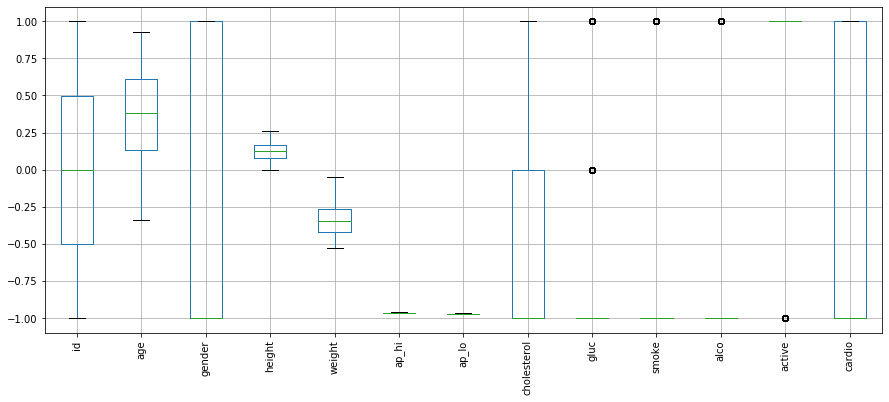

In [41]:
 boxplot = df_norm.boxplot(figsize=(15,6), rot=90)

In [42]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  float64
 1   age          63014 non-null  float64
 2   gender       70000 non-null  float64
 3   height       64062 non-null  float64
 4   weight       63414 non-null  float64
 5   ap_hi        66721 non-null  float64
 6   ap_lo        65106 non-null  float64
 7   cholesterol  70000 non-null  float64
 8   gluc         70000 non-null  float64
 9   smoke        70000 non-null  float64
 10  alco         70000 non-null  float64
 11  active       70000 non-null  float64
 12  cardio       70000 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [43]:
mean_age = df_norm['age'].mean()
df_norm['age'] = df_norm['age'].fillna(mean_age)

mean_height = df_norm['height'].mean()
df_norm['height'] = df_norm['height'].fillna(mean_height)

mean_weight = df_norm['weight'].mean()
df_norm['weight'] = df_norm['weight'].fillna(mean_weight)

mean_ap_hi = df_norm['ap_hi'].mean()
df_norm['ap_hi'] = df_norm['ap_hi'].fillna(mean_ap_hi)

mean_ap_lo = df_norm['ap_lo'].mean()
df_norm['ap_lo'] = df_norm['ap_lo'].fillna(mean_ap_lo)

In [44]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  float64
 1   age          70000 non-null  float64
 2   gender       70000 non-null  float64
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  float64
 8   gluc         70000 non-null  float64
 9   smoke        70000 non-null  float64
 10  alco         70000 non-null  float64
 11  active       70000 non-null  float64
 12  cardio       70000 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [51]:
# x - все столбцы, кроме id и целевого cardio, y = cardio (0 - нет болезни, 1 - есть)
x, y = df_norm.drop(['id', 'cardio'], axis=1), df_norm.cardio

In [52]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
# Посчитаем качество модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" дала точность предсказания порядка {model.score(x_test, y_test)}.')

              precision    recall  f1-score   support

        -1.0       0.70      0.72      0.71     10649
         1.0       0.70      0.69      0.69     10351

    accuracy                           0.70     21000
   macro avg       0.70      0.70      0.70     21000
weighted avg       0.70      0.70      0.70     21000

Модель "рандомных деревьев" дала точность предсказания порядка 0.7021904761904761.


In [48]:
shuffled = df_norm
shuffled = shuffled.sample(frac=1)
shuffled = shuffled.reset_index(drop=True)

In [49]:
from sklearn import metrics

part = len(shuffled)//10

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

mean_score = 0
for i in range(10):
    test = shuffled[i*part:(i+1)*part]
    train = shuffled.drop(shuffled.index[i*part:(i+1)*part])
    # обучаем модель
    train_x = train.drop(['cardio'], axis=1)
    train_y = train.cardio
    test_x = test.drop(['cardio'], axis=1)
    test_y = test.cardio
    model.fit(train_x, train_y)

    model_pred = model.predict(test_x)
    mean_score += metrics.accuracy_score(test_y, model_pred)
    
print(mean_score/10)

0.7151714285714286


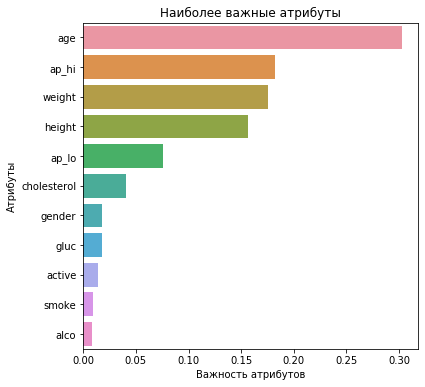

In [54]:
# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

## Гипотеза H0: обследуемые моложе 55 и старше 55 болеют одинаково.

In [57]:
import researchpy as rp

In [58]:
data.describe().age/356 

count    196.629213
mean      54.687825
std        6.930482
min       30.331461
25%       49.617978
50%       55.345506
75%       59.907303
max       66.609551
Name: age, dtype: float64

In [59]:
descriptives, results = rp.ttest(data[data.age <= data.age.quantile()].cardio, data[data.age > data.age.quantile()].cardio)

In [60]:
print(results)

                Independent t-test     results
0  Difference (cardio - cardio) =      -0.1927
1            Degrees of freedom =   69998.0000
2                             t =     -51.9607
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -0.3928
7                     Hedge's g =      -0.3928
8                 Glass's delta =      -0.3928
9                             r =       0.1927


P-value равно нулю, т.е. существует существеное различие между двумя выборками по возрастам.